In [273]:
# CAPSTONE TWO

# Load packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


os.chdir('/Users/andrew/Desktop/Capstone Two')

In [274]:
# Read data
df = pd.read_csv('housing.csv')
# Print first 5 rows
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [275]:
# Shape of the data
df.shape #545 rows, 13 columns

(545, 13)

In [276]:
# get non null counts & Data types per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [277]:
# Search for missing values / NA / NaN
df.isnull().sum()

# If no missing values, print statement
if (df.all().isnull().sum() == 0):
    print("No missing values found.")


No missing values found.


There was a total of 15 outliers identified.


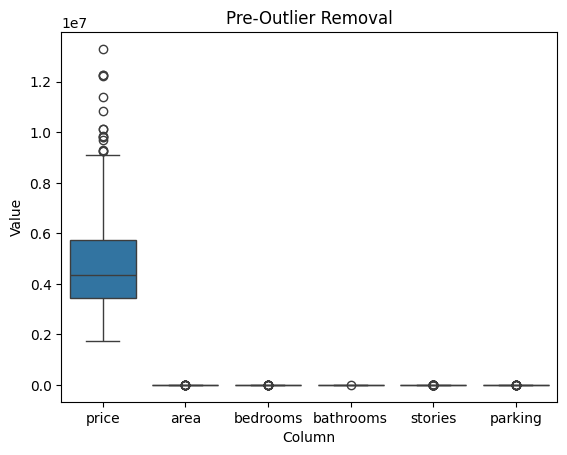

In [278]:
# Outlier Identification
sns.boxplot(data=df)
plt.xlabel("Column")
plt.ylabel('Value')
plt.title("Pre-Outlier Removal")
# Outliers found in price outside of the IQR

# Identification

# IQR Calculation
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3-Q1

# Bounds Identification
lowerbound = Q1 - 1.5 * IQR
upperbound = Q3 + 1.5 * IQR

# Find outliers outside of the bounds
outliers = df[(df['price'] <= lowerbound) | (df['price'] >= upperbound)]

# Print number of outliers 
print(f"There was a total of",len(outliers),'outliers identified.')

(530, 13)


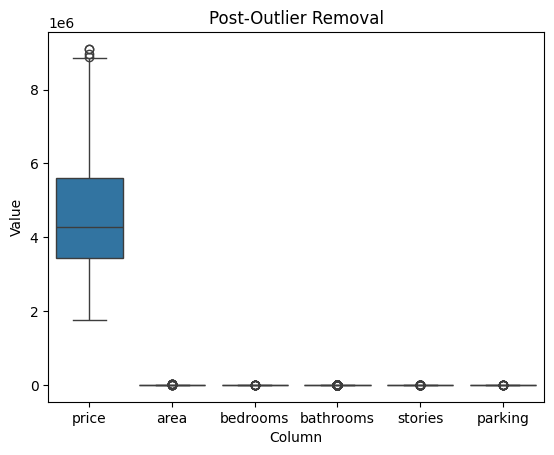

In [279]:
# Subset df to remove outliers
df = df[(df['price'] >= lowerbound) & (df['price'] <= upperbound)]
print(df.shape)

# Plot for confirmation
sns.boxplot(data=df)
plt.xlabel("Column")
plt.ylabel('Value')
plt.title("Post-Outlier Removal")
plt.show();

In [280]:
# Summary Statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,530.0,4.600663e+06,1.596119e+06,1750000.0,3430000.0,4270000.0,5600000.00,9100000.0
area,530.0,5.061519e+03,2.075449e+03,1650.0,3547.5,4500.0,6315.75,15600.0
bedrooms,530.0,2.943396e+00,7.305149e-01,1.0,2.0,3.0,3.00,6.0
bathrooms,530.0,1.260377e+00,4.643591e-01,1.0,1.0,1.0,1.00,3.0
stories,530.0,1.788679e+00,8.611902e-01,1.0,1.0,2.0,2.00,4.0
parking,530.0,6.641509e-01,8.433201e-01,0.0,0.0,0.0,1.00,3.0


In [281]:
# Check for Duplicated rows
df.duplicated().sum()

# If no duplicate values, print statement
if (df.duplicated().sum() == 0):
    print("No duplicate values found.")

No duplicate values found.


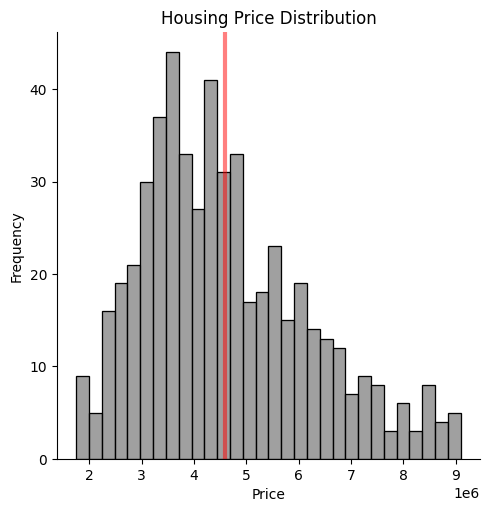

In [282]:
# Housing price distribution
# Calculate mean home price
pricemean = df['price'].mean()

# Distribution plot to show prices
sns.displot(df['price'], bins=30, color='gray')

# Plot features
plt.axvline(pricemean, color='red', linewidth=3, alpha=0.5)
plt.title('Housing Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency');

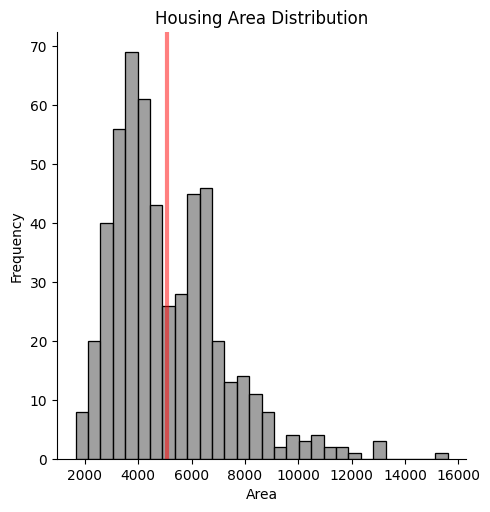

In [283]:
# Housing area distribution
# Calculate mean area per home
areamean = df['area'].mean()

# Dsitribution plot to show areas
sns.displot(df['area'], bins=30, color='gray')

# Plot features
plt.axvline(areamean, color='red', linewidth=3, alpha=0.5)
plt.title('Housing Area Distribution')
plt.xlabel('Area')
plt.ylabel('Frequency');

# Area and price seem to have a correlation based on the plot distributions

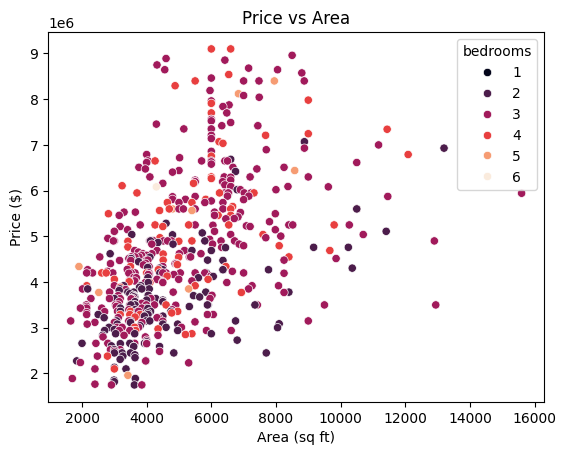

In [284]:
# Area VS Price scatterplot
sns.scatterplot(x='area', y='price', data=df, hue='bedrooms', palette='rocket')
plt.title('Price vs Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.show();

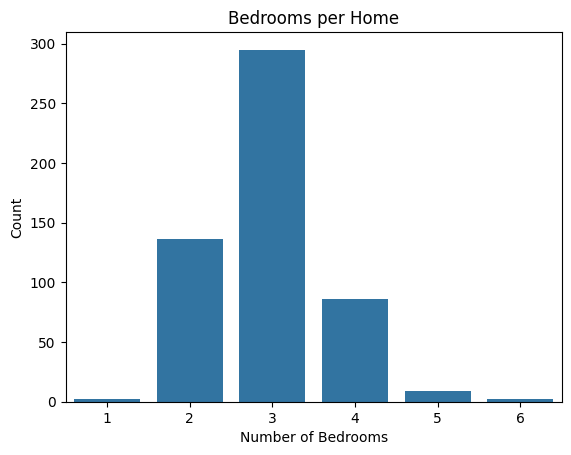

3 Bedrooms is the most frequent in the data, with 295 homes having 3 bedrooms.


In [285]:
# Bedrooms countplot
sns.countplot(x='bedrooms', data=df)
plt.title("Bedrooms per Home")
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show();

# Count most frequent value (3)
most_freq = (df['bedrooms'] ==3).sum()

print(f'3 Bedrooms is the most frequent in the data, with',most_freq,'homes having 3 bedrooms.')
# 3 bedrooms is most common for houses in the dataset

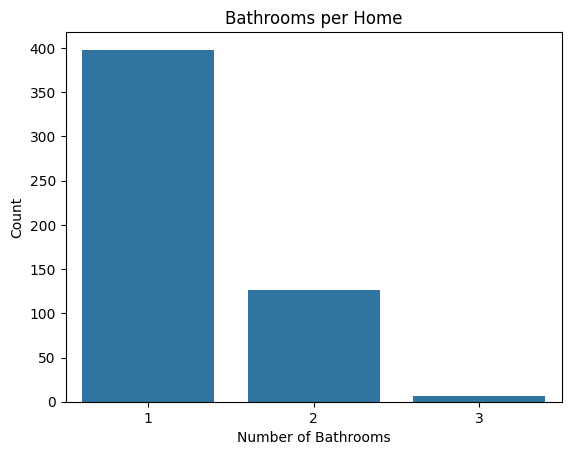

1 bathroom is most common for houses in the dataset, with very few homes having 3 bathrooms


In [286]:
# Bathrooms countplot
sns.countplot(x='bathrooms', data=df)
plt.title("Bathrooms per Home")
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.show();

print('1 bathroom is most common for houses in the dataset, with very few homes having 3 bathrooms')

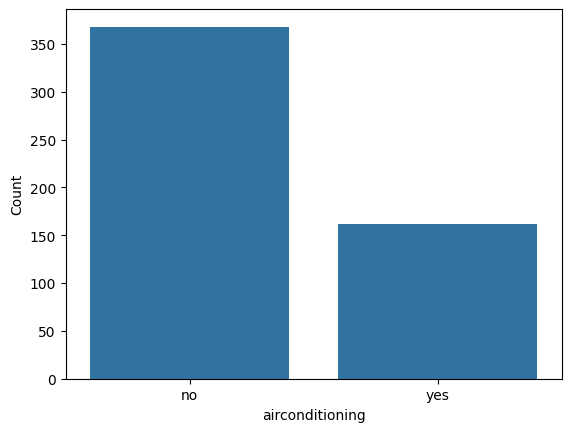

Percent of houses with air conditioning; 30.566 %


In [287]:
# Does the property have A/C?
sns.countplot(x='airconditioning', data=df)
plt.ylabel('Count')
plt.show();

# Majority of houses in the dataset dont have A/C

# Calculate percent of houses with air conditioning
AC_houses = round((df['airconditioning'] == 'yes').sum() / len(df) * 100, 4)
print(f'Percent of houses with air conditioning;',AC_houses,'%')

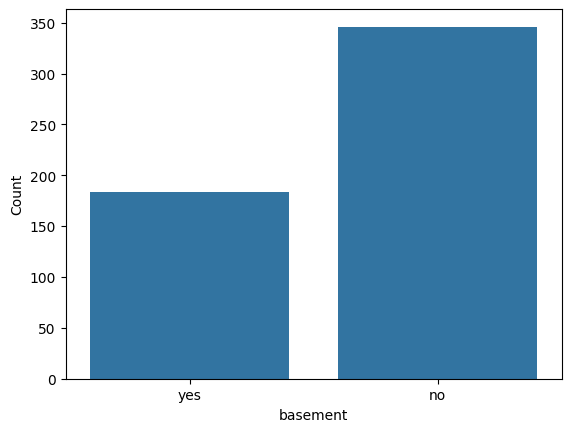

Percent of houses with a basement; 34.717 %


In [288]:
# Basement Countplot
sns.countplot(x='basement', data=df)
plt.ylabel('Count')
plt.show();

# Majority of houses in the dataset dont have a basement

# Count the percent of houses with a basement
basement_houses = round((df['basement'] == 'yes').sum() / len(df) * 100, 4)
print(f'Percent of houses with a basement;',basement_houses,'%')

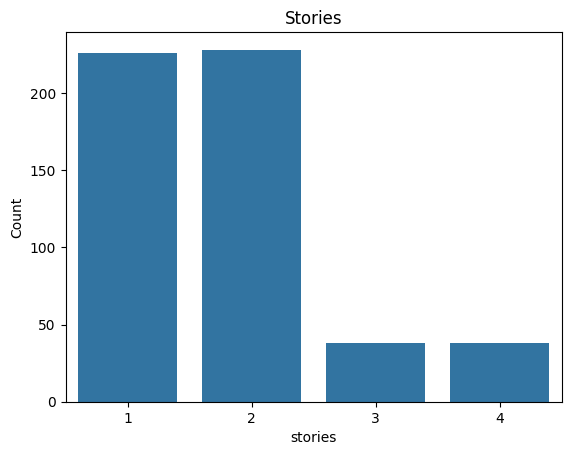

In [289]:
# Stories per house countplot
sns.countplot(x='stories', data=df)
plt.title("Stories")
plt.ylabel('Count')
plt.show();

# Most homes have 1 or 2 stories, with some having up to 4

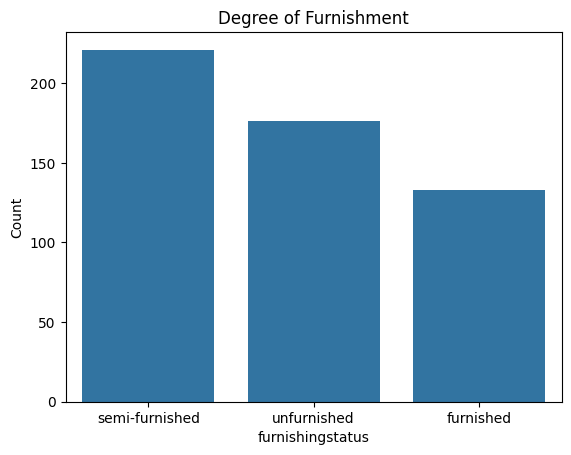

In [290]:
# Furnish countplot
sns.countplot(x='furnishingstatus', data=df)
plt.title("Degree of Furnishment")
plt.ylabel('Count')
plt.show();

In [291]:
#list categorical features
catfeats = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Create binary features for categorical columns
df = pd.get_dummies(df, columns=catfeats).astype(int)

# Drop categorical columns
#df = df.drop(columns=catfeats)

print(df)

       price  area  bedrooms  bathrooms  stories  parking  mainroad_no  \
15   9100000  6000         4          1        2        2            0   
16   9100000  6600         4          2        2        1            0   
17   8960000  8500         3          2        4        2            0   
18   8890000  4600         3          2        2        2            0   
19   8855000  6420         3          2        2        1            0   
..       ...   ...       ...        ...      ...      ...          ...   
540  1820000  3000         2          1        1        2            0   
541  1767150  2400         3          1        1        0            1   
542  1750000  3620         2          1        1        0            0   
543  1750000  2910         3          1        1        0            1   
544  1750000  3850         3          1        2        0            0   

     mainroad_yes  guestroom_no  guestroom_yes  ...  basement_yes  \
15              1             1           

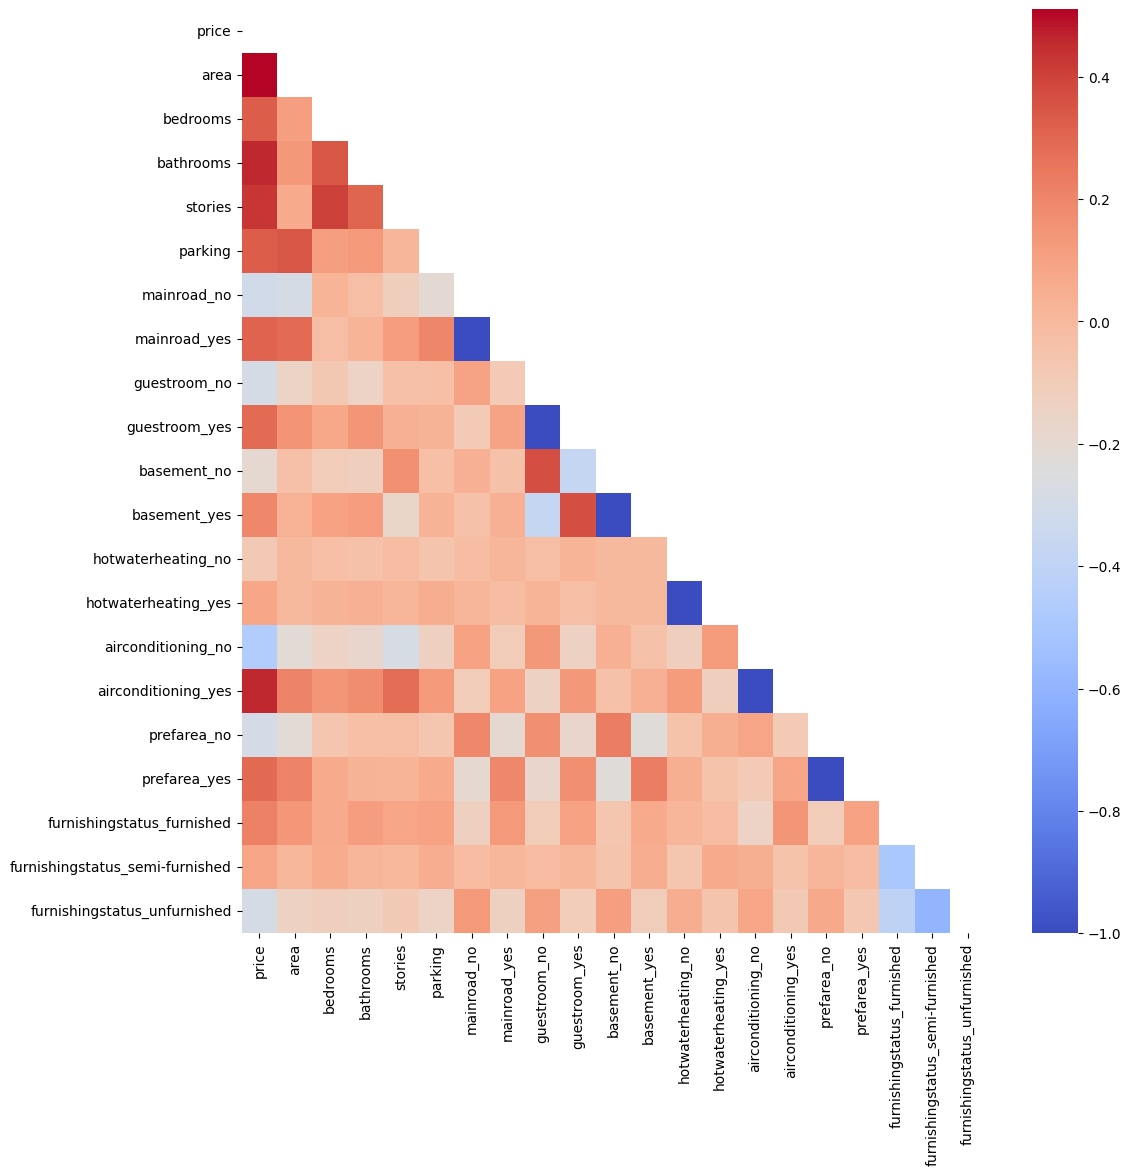

In [292]:
# Correlation Heatmap
corr = df.corr()

# Mask to remove duplicate correlations
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.subplots(figsize=(12,12))
sns.heatmap(corr, annot=False, mask=mask, cmap='coolwarm');

# Price is correlated most with area, bathrooms, air conditioning and stories of the house

In [293]:
# Feature Engineering

# Price / Area
df['price_per_area'] = df['price'] / df['area']

# Total rooms per house
df['total_rooms'] = df['bathrooms'] + df['bedrooms'] + df['guestroom_yes']

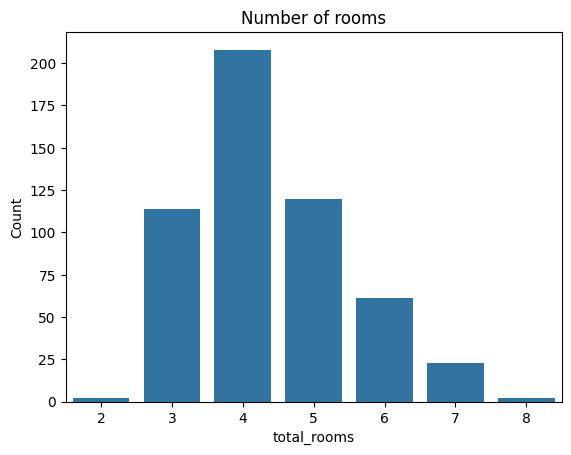

In [294]:
# Total rooms
sns.countplot(x='total_rooms', data=df)
plt.title("Number of rooms")
plt.ylabel('Count')
plt.show();

# From bedrooms, bathrooms, and guestrooms, most properties have 4.

On average, you can expect to pay 981.1816 per square foot
There is a total of 240 houses with price per sq ft over the mean, which equates to 45.283 % of the data


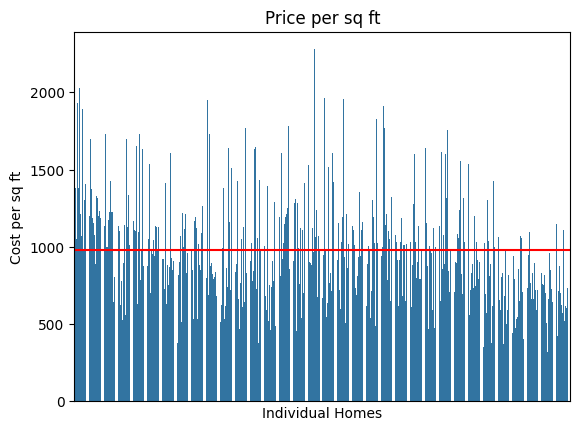

In [295]:
#Calculate Mean price per sq ft per home
meanprice = round(df['price_per_area'].mean(), 4)

# Barplot representing cost per sq ft, per house
sns.barplot(df['price_per_area'])
# Add mean line
plt.axhline(meanprice, color='red')
plt.title('Price per sq ft')
plt.xlabel('Individual Homes')
plt.xticks([])
plt.ylabel('Cost per sq ft');

print(f"On average, you can expect to pay",meanprice,"per square foot")

# Find the percent of houses in the dataset that cost more than the mean
countovermean = (df['price_per_area'] >= meanprice).sum()
percent_fromtotal = round(countovermean / len(df) * 100, 4)
print(f"There is a total of",countovermean,"houses with price per sq ft over the mean, which equates to",percent_fromtotal,"% of the data")

In [296]:
df.shape

(530, 23)

### Exploratory Data Analysis Summary

* The dataset contained no missing values or duplicated rows.
* Using the IQR, 15 outliers were identified in the price column, and removed from the data.
* 3 bedrooms with 1 bathroom is most common for homes in the dataset.
* 1-2 stories is common, with some homes having up to 4.
* The price of a home is correlated most with the area (in sq ft), number of bathrooms, air conditioning, and number of stories the house contains.
* On average, you can expect to pay approximately $993 per square foot of property.
* Dummy features were created using pd.get_dummies for categorical columns. The final shape of the dataframe is 530 rows by 23 columns

In [297]:
#Save independent variable 'Price'
price = df['price']

#Drop our 'Y', price
df = df.drop(columns='price')

#Initialize scaler to normalize features
scaler = MinMaxScaler()

#Scale the features
scaled_features = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_features


,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,...,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price_per_area,total_rooms
0,0.311828,0.6,0.0,0.333333,0.666667,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.620709,0.500000
1,0.354839,0.6,0.5,0.333333,0.333333,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.552038,0.833333
2,0.491039,0.4,0.5,1.000000,0.666667,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.390335,0.500000
3,0.211470,0.4,0.5,0.333333,0.666667,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.827870,0.666667
4,0.341935,0.4,0.5,0.333333,0.333333,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.552285,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,0.096774,0.2,0.0,0.000000,0.666667,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.167481,0.166667
526,0.053763,0.4,0.0,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.232051,0.333333
527,0.141219,0.2,0.0,0.000000,0.000000,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.106100,0.166667
528,0.090323,0.4,0.0,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.164845,0.333333


In [298]:
# Split the data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, price, test_size=0.2, shuffle=True, random_state=999)

In [299]:
print("Training features shape:")
print(X_train.shape)
print("Testing features shape:")
print(X_test.shape)
print('Training columns to predict (price) shape:')
print(y_train.shape)
print('Testing columns to predict (price) shape:')
print(y_test.shape)

Training features shape:
(424, 22)
Testing features shape:
(106, 22)
Training columns to predict (price) shape:
(424,)
Testing columns to predict (price) shape:
(106,)
